<a href="https://colab.research.google.com/github/gr-uzun/medical-cost-analysis/blob/main/medical_cost_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**@author :** Gürkan UZUN

**@since :** 2023.08.22

**@see :**
- https://www.kaggle.com/datasets/mirichoi0218/insurance
- https://www.kaggle.com/code/hely333/eda-regression
- https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
- https://www.kaggle.com/code/janiobachmann/patient-charges-clustering-and-regression

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In this project, you will be trying to develop an end-to-end data science application using the dataset given above. The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables. While creating the project, try to follow the instructions below and make sure that the project is unique.

Creating a Google Colaboratory File
Make sure your project has .ipynb extension.
Make sure that there are comment lines explaining the details in your project.
When submitting the project, submit the cells of this .ipynb file so that the cells are run and the results are visible.

1. **Creating a Google Colaboratory File**
    - Make sure your project has .ipynb extension.
    - Make sure that there are comment lines explaining the details in your project.
    - When submitting the project, submit the cells of this .ipynb file so that the cells are
run and the results are visible.

2. **Importing Required Libraries**
    - Import the required libraries for the project to the Colab environment.
    - Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis

In [108]:
# Importing Required Libraries
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [109]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

<ipython-input-109-4bd61155b3f9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Read insurance.csv file and import dataset**

In [110]:
# Import dataset
path ='./dataset/'
df_insurance = pd.read_csv(path+'insurance.csv')

print('\nNumber of rows and columns in the data set: ',df_insurance.shape)
print('')

df_insurance.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df = df_insurance.copy()

#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [63]:
# convert categorical string columns to int datatype

# df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# df['region'] = df['region'].map({'northwest': 0, 'northeast': 1,'southwest': 2, 'southeast' :3})

# print('\nNumber of rows and columns in the data set: ',df.shape)
# print('')

# Lets look into top few rows and columns in the dataset
# df.head()

3. **Perform An Exploratory Data Analysis**
    - Analyze the data and draw meaningful conclusions from the data.
      - Examine the distribution of Bmi (Body Mass Index)
      - Examine the relationship between “smoker” and “charges”
      - Examine the relationship between “smoker” and “region”.
      - Examine the relationship between “bmi” and “sex”.
      - Find the "region" with the most "children".
      - Examine the relationship between “age” and “bmi”.
      - Examine the relationship between “bmi” and “children”.
      - Is there an outlier in the "bmi" variable? Please review.
      - Examine the relationship between “bmi” and “charges”.
      - Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
    - Try to use data visualization techniques as much as possible while examining the

In [112]:
# Examine the distribution of Bmi (Body Mass Index)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [113]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<Axes: xlabel='bmi'>

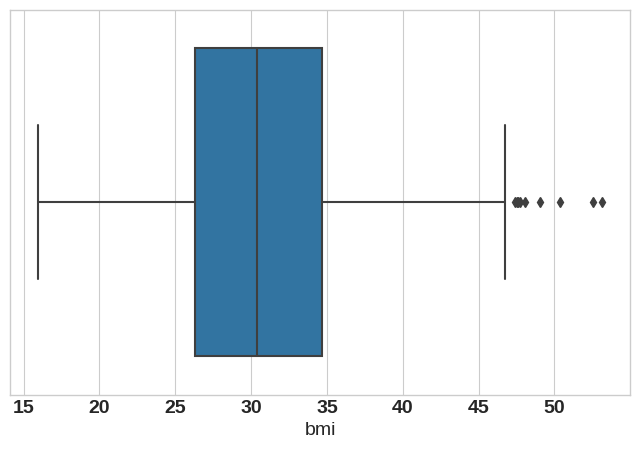

In [114]:
sns.boxplot(x='bmi',data=df)

In [115]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [124]:
def example_plot(ax, fontsize=12, hide_labels=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if hide_labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)

AttributeError: ignored

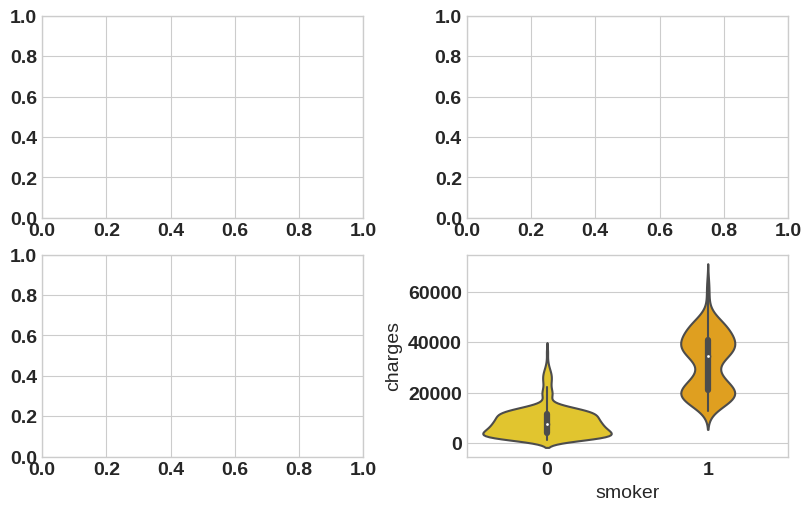

In [123]:
# Examine the relationship between “smoker” and “charges”
# Examine the relationship between “smoker” and “region”.
# Examine the relationship between “bmi” and “sex”.
# Find the "region" with the most "children".
# Examine the relationship between “age” and “bmi”.
# Examine the relationship between “bmi” and “children”.

""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable
and charges as dependent variable"""


f, ax = plt.subplots(2, 2, layout="constrained")

#f = plt.figure(figsize=(14,6))
#ax = f.add_subplot(1,1,1)
sns.violinplot(x='smoker', y='charges',data=df,palette='Wistia')
ax.plot([1, 1])
#ax.set_title('Violin plot of Charges vs Smoker')

#ax = f.add_subplot(2,1,1)
sns.violinplot(x='smoker', y='region',data=df,palette='magma',ax=ax)
ax.plot([1, 2])

#ax.set_title('Violin plot of Region vs Smoker');

#ax = f.add_subplot(3,1,1)
sns.violinplot(x='bmi', y='sex',data=df,palette='magma',ax=ax)
ax.plot([2, 1])

#ax.set_title('Violin plot of Sex vs BMI');